In [5]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
import os 

os.getcwd()
os.chdir('house-prices-advanced-regression-techniques')

In [6]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
fulldata=[train,test]

In [7]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [8]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

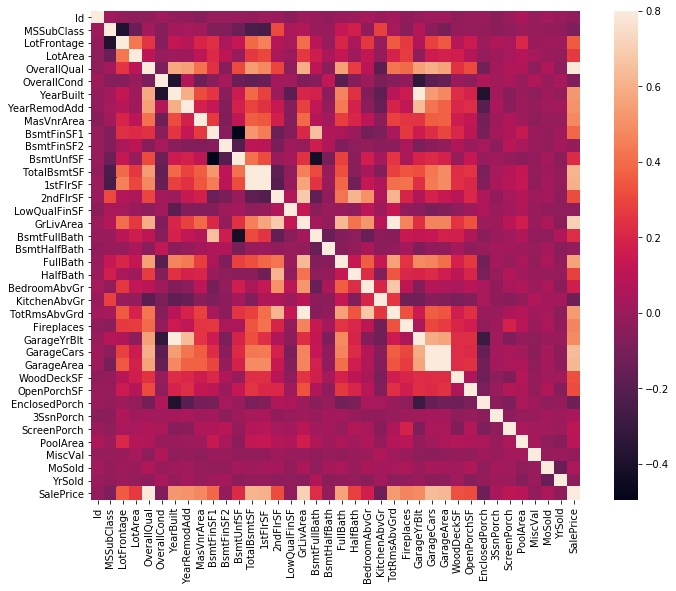

In [10]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


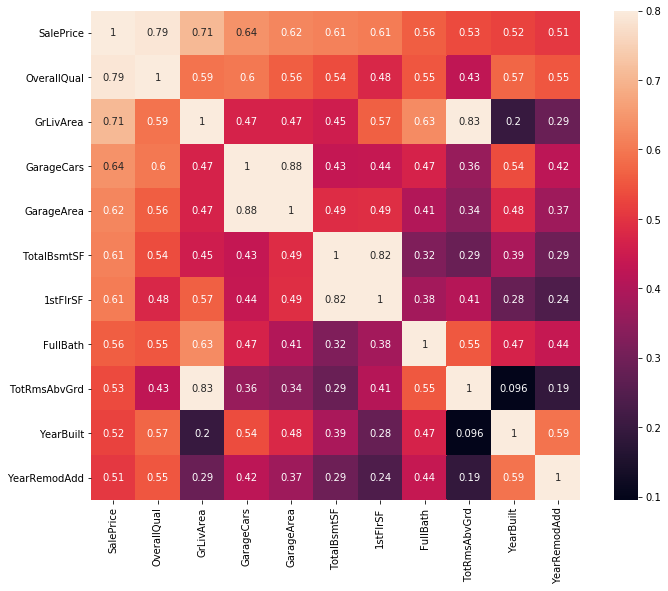

In [11]:
price_corr=train.corr().loc[:,['SalePrice']].sort_values(by='SalePrice',ascending=False)
corrlist=price_corr[:11].index

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train[corrlist].corr(), vmax=.8, square=True,annot=True);

#sns.heatmap(corrmat, vmax=.8, square=True);

C:\Users\Changgwon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Changgwon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Changgwon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface

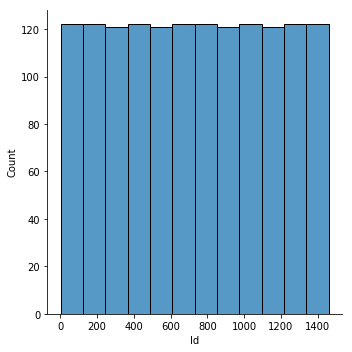

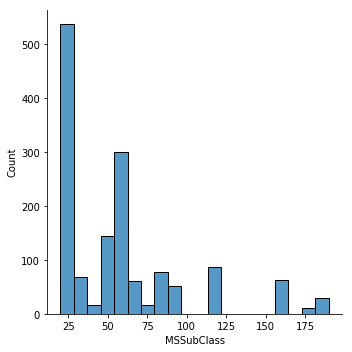

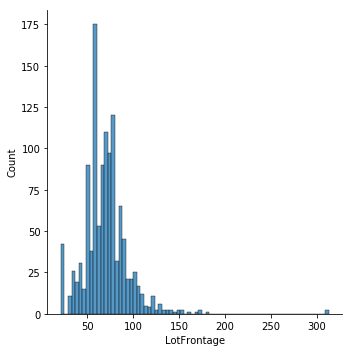

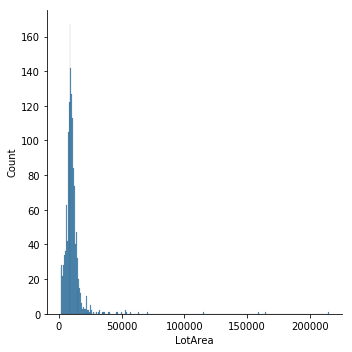

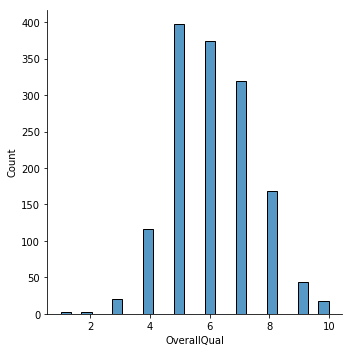

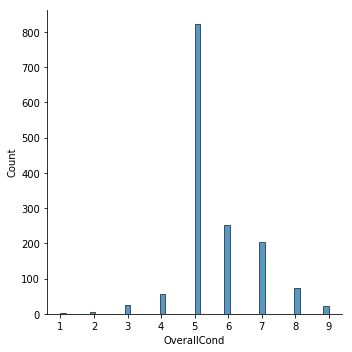

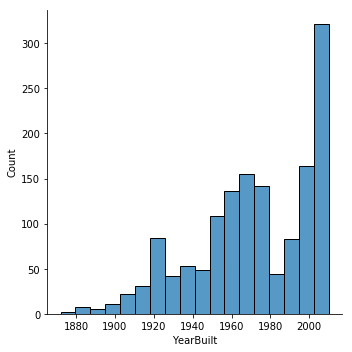

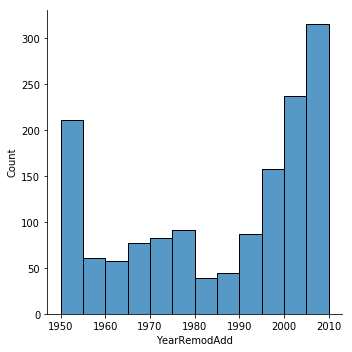

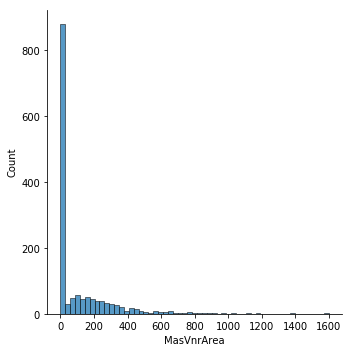

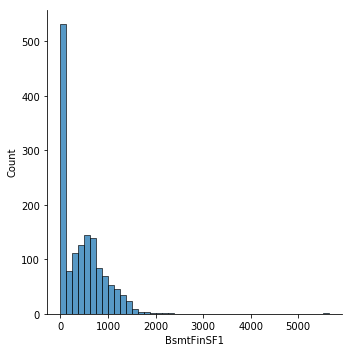

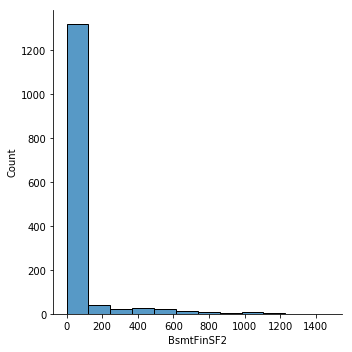

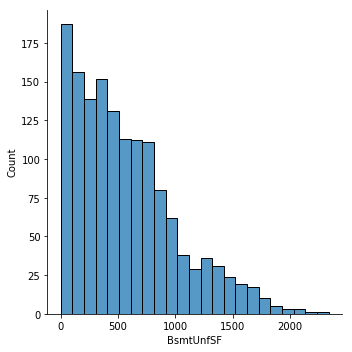

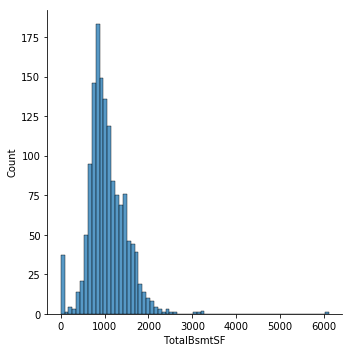

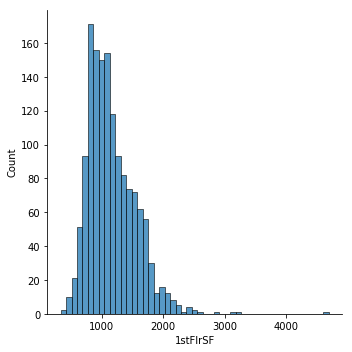

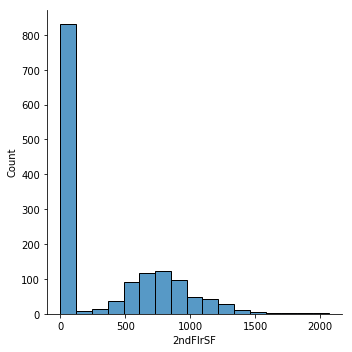

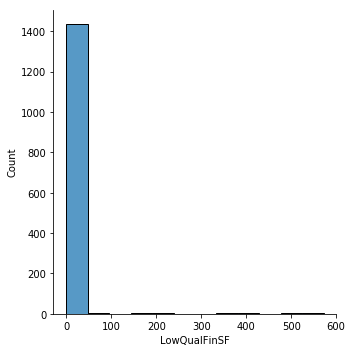

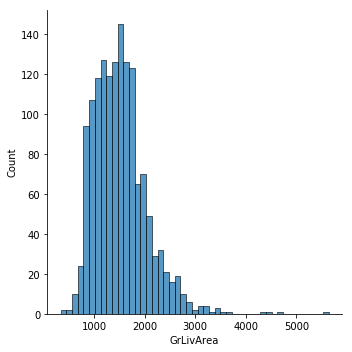

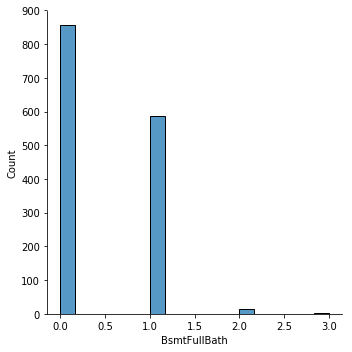

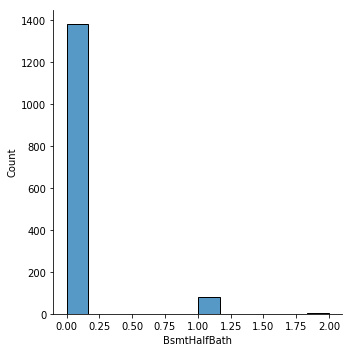

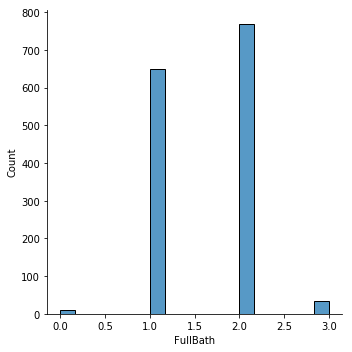

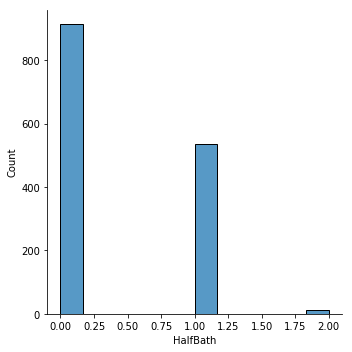

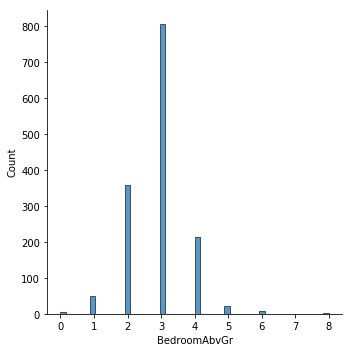

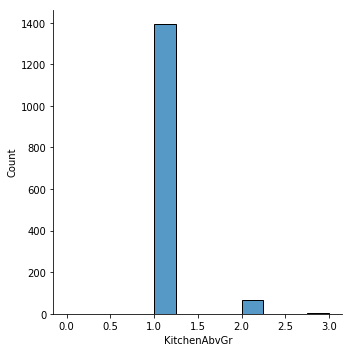

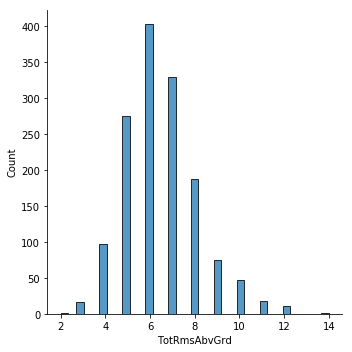

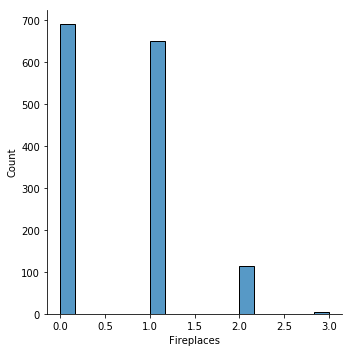

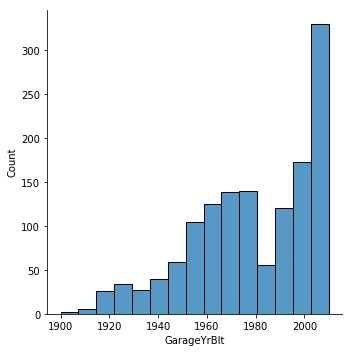

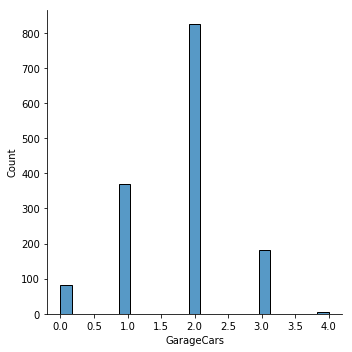

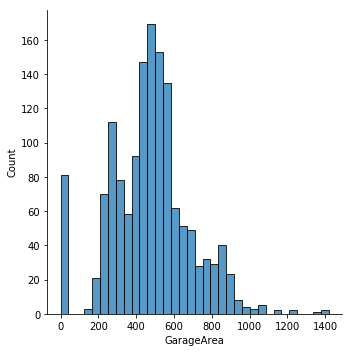

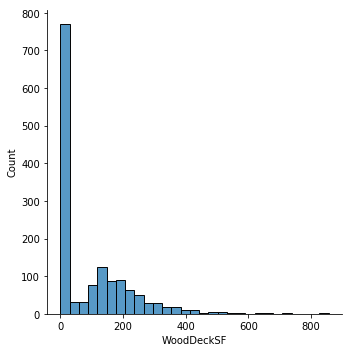

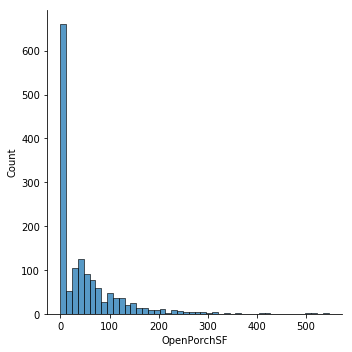

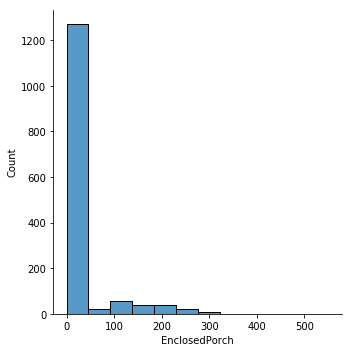

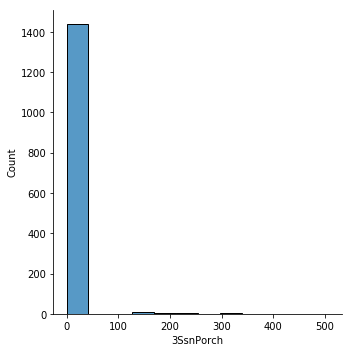

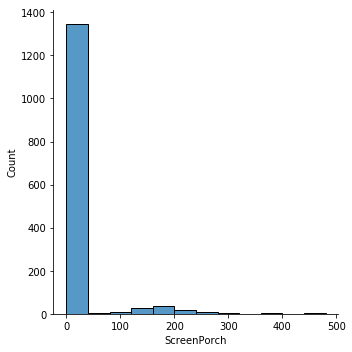

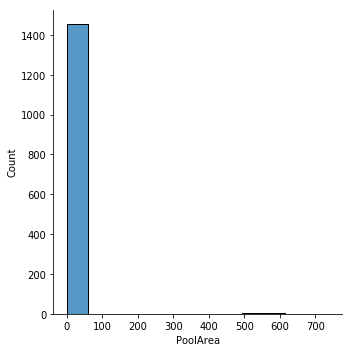

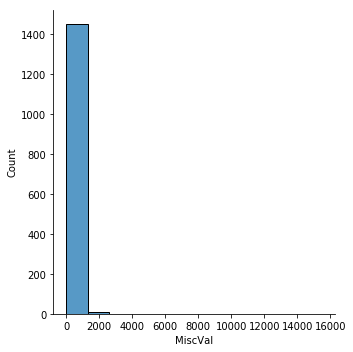

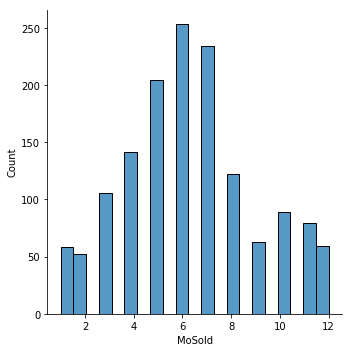

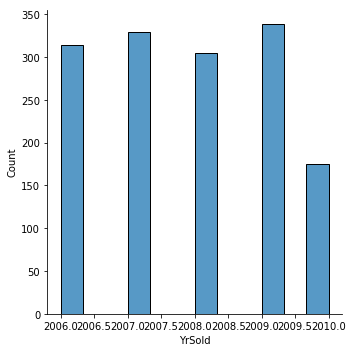

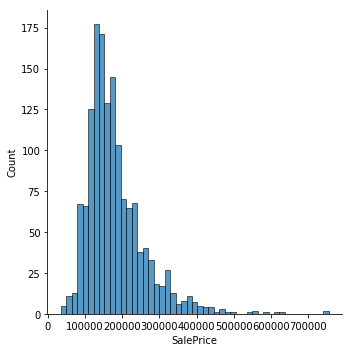

In [12]:
for col in train:
    if train[col].dtype == 'float64' or train[col].dtype == 'int64' :
        sns.displot(train[col])

In [13]:
#log trans
# log_trans_list=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']

# for col in log_trans_list:
#     for data in fulldata:
#         data[col]=np.log1p(data[col])
# train['SalePrice']=np.log1p(train['SalePrice'])

#import scipy.special as sc
#sc.log1p(x)

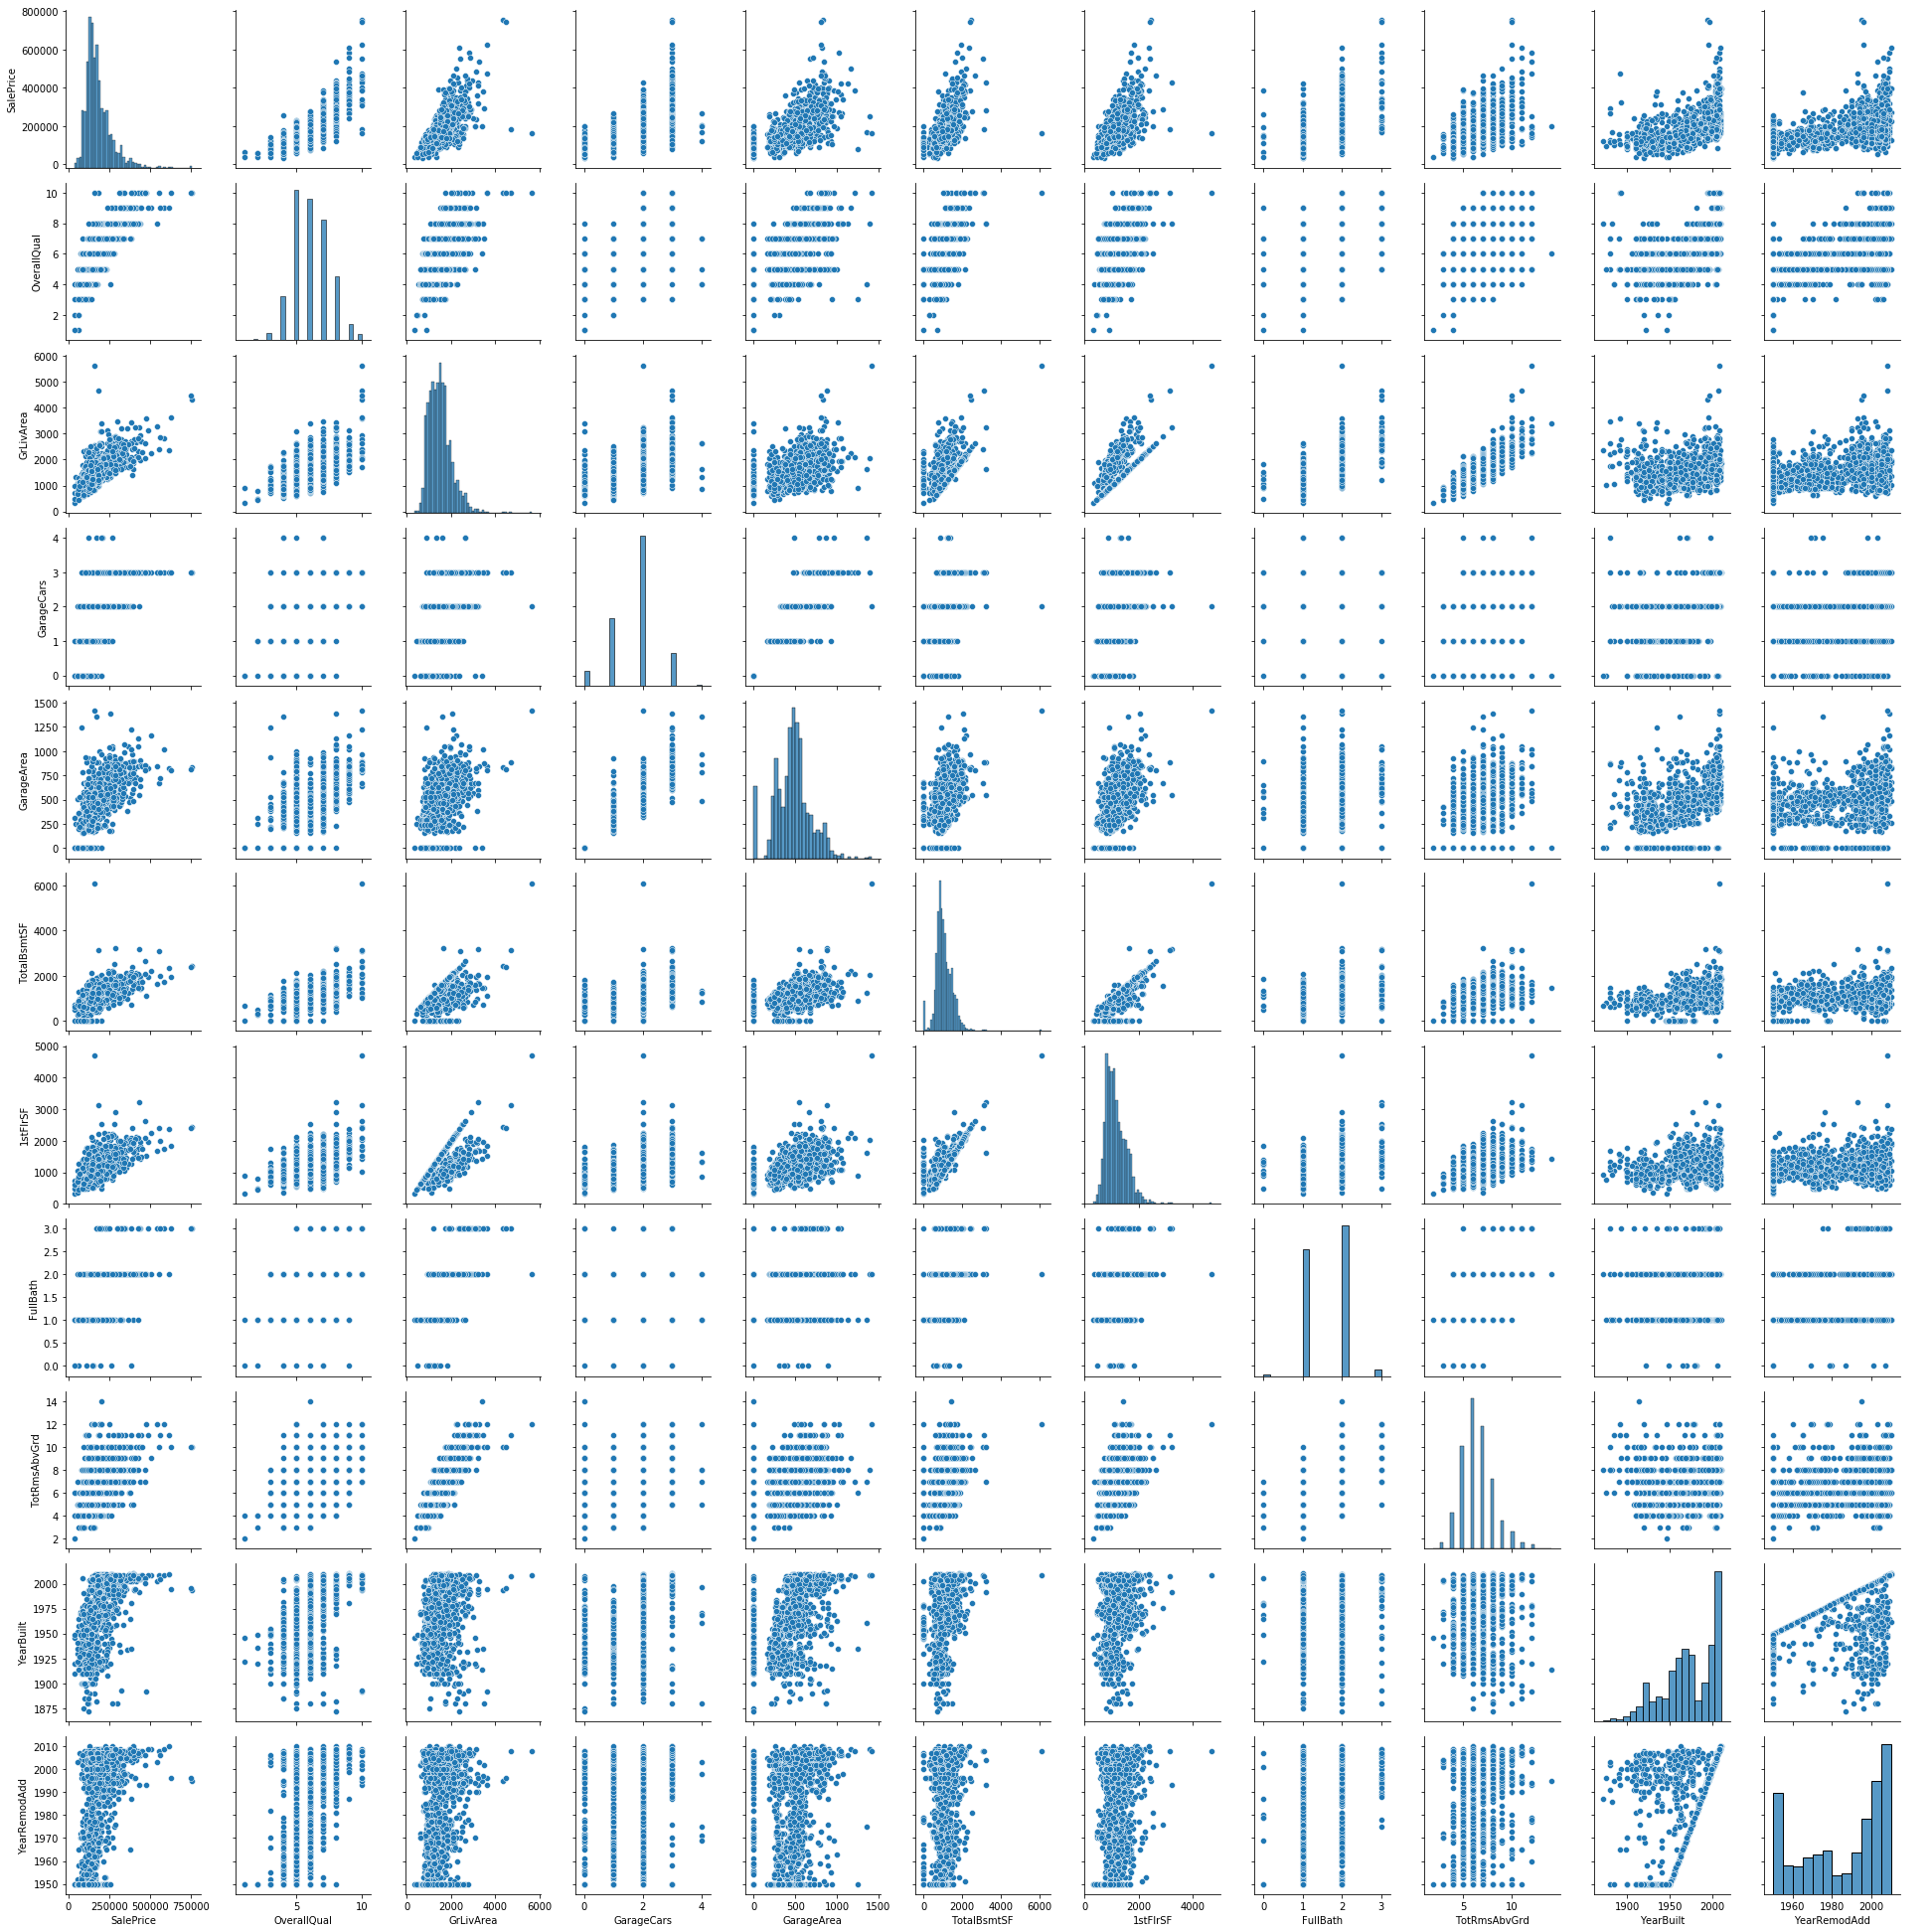

In [14]:
sns.pairplot(train[corrlist])

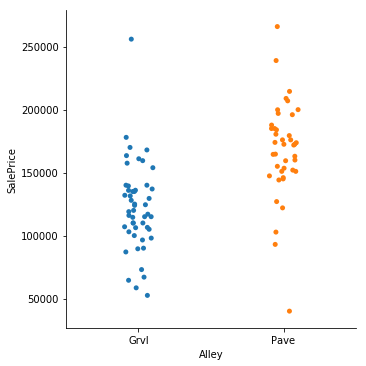

In [15]:
#category별 차이가 있는 지 확인 
sns.catplot(x="Alley", y="SalePrice", data=train)

In [16]:
#"NA" in Alley means the property has no alley access

for data in fulldata:
    data['Alley'].fillna("noalley",inplace=True)


In [17]:
#결측값 하나인거 제거
train.drop(train[train['Electrical'].isnull()].index,inplace=True)

In [18]:
from sklearn.impute import SimpleImputer

#freq=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']
#Non=['GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType']
drop=['GarageYrBlt','MasVnrArea','PoolQC','Fence','MiscFeature','FireplaceQu','LotFrontage','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType']
#zero=['GarageYrBlt','MasVnrArea']

# for data in fulldata:
#     for i in freq:
#         imputer = SimpleImputer(strategy = 'most_frequent')
#         data[i]=imputer.fit_transform(data[i].values.reshape(-1,1))
#     for i in Non:
        
#         data[i].fillna("None",inplace=True)
#     for i in zero:
#         data[i].fillna(0,inplace=True)
        

In [19]:
for data in fulldata:
    data.drop(drop, axis=1,inplace=True)

In [20]:
y=train['SalePrice']
testid=test['Id']
for data in fulldata:
    data.drop(['Id'],axis=1,inplace=True)
train.drop('SalePrice',axis=1,inplace=True)

    

In [21]:
nacol=test.columns[test.isna().any()]
for i in nacol:
    if test[i].dtype=='object':
        imputer = SimpleImputer(strategy = 'most_frequent')
        test[i]=imputer.fit_transform(test[i].values.reshape(-1,1))
    else:
        imputer = SimpleImputer(strategy = 'mean')
        print(i)
        test[i]=imputer.fit_transform(test[i].values.reshape(-1,1))

BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageCars
GarageArea


In [22]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0


columns=test.columns
columns
for col in train:
    if train[col].dtype == 'object':
        if len(list(train[col].unique())) <=2:
            le.fit(train[col])
            train[col]=le.transform(train[col])
            test[col]=le.transform(test[col])
            le_count += 1
print('%d columns were label encoded.' % le_count)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
#column다를 때 맞춰 주는 코드
#y=train['Survived']
train,test = train.align(test, join = 'inner', axis = 1)

3 columns were label encoded.


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, np.log1p(y), test_size=0.3, random_state=1)


In [44]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1)
forest.fit(X_train, y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train : %0.3f, test: %0.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R**2 train : %0.3f, test: %0.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train : 0.003, test: 0.022
R**2 train : 0.983, test: 0.861


In [48]:
from sklearn.model_selection import GridSearchCV
depth_range=[1,2,3,4,5,6,7,8,9,10]
n_estimators_range=[10,50,100,150]
param_grid = [{'max_depth': depth_range, 'n_estimators': n_estimators_range},
              ]
gs = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), param_grid=param_grid,
                  scoring='neg_root_mean_squared_error', cv=5)
gs = gs.fit(X_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
clf.score(X_test, y_test)

0.14294828957872752
{'max_depth': 10, 'n_estimators': 100}
0.9775312158492954


0.8579571715002783

In [39]:
forest=RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1)
forest.fit(train, np.log1p(y))
predictions=np.expm1(forest.predict(test))

In [40]:
sample=pd.read_csv(r"C:\Users\Changgwon\Desktop\하창권\대학원\취업\지원서\CNS\house-prices-advanced-regression-techniques\sample_submission.csv")
# Make a submission dataframe
submit = sample[['Id']]
submit['SalePrice'] = predictions

# Save the submission dataframe
submit.to_csv('submission.csv', index = False)
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "randomforest"

Successfully submitted to House Prices: Advanced Regression Techniques



  0%|          | 0.00/35.1k [00:00<?, ?B/s]
 23%|##2       | 8.00k/35.1k [00:00<00:00, 50.9kB/s]
100%|##########| 35.1k/35.1k [00:03<00:00, 10.0kB/s]


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, np.log1p(y), test_size=0.3, random_state=1)


In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg=xgb.XGBRegressor(objective='reg:squarederror',booster='gbtree',colsample_bytree=0.75, 
                        max_depth=1, n_estimators=120)
xg_reg.fit(X_train, y_train)
pred_train=xg_reg.predict(X_train)
pred_test=xg_reg.predict(X_test)
rmse_train=np.sqrt(mean_squared_error(y_train,pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,pred_test))
print('RMSE train : %0.3f, test: %0.3f' %(rmse_train, rmse_test))
print('R**2 train : %0.3f, test: %0.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

RMSE train : 0.106, test: 0.140
R**2 train : 0.983, test: 0.861


In [35]:
xgboost=xgb.XGBRegressor(max_depth=1,n_estimators=100, objective='reg:squarederror', random_state=1)
xgboost.fit(train, y)
predictions=np.expm1(xgboost.predict(test))

C:\Users\Changgwon\AppData\Roaming\Python\Python36\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in expm1
  app.launch_new_instance()


In [36]:
sample=pd.read_csv(r"C:\Users\Changgwon\Desktop\하창권\대학원\취업\지원서\CNS\house-prices-advanced-regression-techniques\sample_submission.csv")
# Make a submission dataframe
submit = sample[['Id']]
submit['SalePrice'] = predictions

# Save the submission dataframe
submit.to_csv('submission.csv', index = False)
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "로그변환, n_est50"

Successfully submitted to House Prices: Advanced Regression Techniques



  0%|          | 0.00/14.3k [00:00<?, ?B/s]
 56%|#####6    | 8.00k/14.3k [00:00<00:00, 46.8kB/s]
100%|##########| 14.3k/14.3k [00:04<00:00, 3.45kB/s]


In [37]:
from lightgbm import LGBMRegressor
lgbm_reg=LGBMRegressor(n_estimators=100)
lgbm_reg.fit(X_train, y_train)
pred_train=lgbm_reg.predict(X_train)
pred_test=lgbm_reg.predict(X_test)
rmse_train=np.sqrt(mean_squared_error(y_train,pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,pred_test))
print('RMSE train : %0.3f, test: %0.3f' %(rmse_train, rmse_test))
print('R**2 train : %0.3f, test: %0.3f' %(r2_score(np.expm1(y_train), y_train_pred), r2_score(np.expm1(y_test), y_test_pred)))

RMSE train : 0.044, test: 0.137
R**2 train : -5.008, test: -5.675


In [ ]:
predictions=np.expm1(lgbm_reg.predict(test))
sample=pd.read_csv(r"C:\Users\Changgwon\Desktop\하창권\대학원\취업\지원서\CNS\house-prices-advanced-regression-techniques\sample_submission.csv")
# Make a submission dataframe
submit = sample[['Id']]
submit['SalePrice'] = predictions

# Save the submission dataframe
submit.to_csv('submission.csv', index = False)
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "로그변환, lgbm n=100"


In [ ]:
train=pd.read_csv(r"C:\Users\Changgwon\Desktop\하창권\대학원\취업\지원서\CNS\house-prices-advanced-regression-techniques\train.csv")
test=pd.read_csv(r"C:\Users\Changgwon\Desktop\하창권\대학원\취업\지원서\CNS\house-prices-advanced-regression-techniques\test.csv")

In [ ]:

y=train['SalePrice']
train.drop(['SalePrice','Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)
objt=[]
for col in train:
    if train[col].dtype == 'object':
        objt.append(col)
train=train.fillna('nan')
test=test.fillna('nan')

In [ ]:
cat_features=[train.columns.get_loc(col) for col in objt]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=1)


In [ ]:
from catboost import Pool,CatBoostRegressor
train_data=X_train
eval_data=X_test
train_label=y_train
eval_label=y_test
#cat_features=[1,2,3,4]
train_dataset=Pool(data=train_data,label=train_label,cat_features=cat_features)
eval_dataset=Pool(data=eval_data,label=eval_label,cat_features=cat_features)

model=CatBoostRegressor(l2_leaf_reg=0.01,iterations=40000,depth=3,eval_metric='RMSE',one_hot_max_size=3)
model.fit(train_dataset,use_best_model=True,eval_set=eval_dataset)

In [ ]:
train_dataset=Pool(data=train,label=np.log1p(y),cat_features=cat_features)
model=CatBoostRegressor(l2_leaf_reg=0.01,iterations=100000,depth=3,eval_metric='RMSE',one_hot_max_size=3)
model.fit(train_dataset)
predictions=np.expm1(model.predict(test))

In [ ]:
sample=pd.read_csv(r"C:\Users\Changgwon\Desktop\하창권\대학원\취업\지원서\CNS\house-prices-advanced-regression-techniques\sample_submission.csv")
# Make a submission dataframe
submit = sample[['Id']]
submit['SalePrice'] = predictions

# Save the submission dataframe
submit.to_csv('submission.csv', index = False)
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "catboost n=100000"